In [1]:
import numpy as np
import sys
import math
import matplotlib.pyplot as plt
sys.path.append('/home/hcleroy/PostDoc/aging_condensates/Simulation/Gillespie/Gillespie_backend')
import Gillespie_backend as gil
def truncate(number, digits) -> float:
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepper
sys.path.append('/home/hcleroy/PostDoc/aging_condensates/Simulation/Gillespie/Analysis_cluster/')
import Simulate as Sim
import os

class Simulation(Sim.ParallelSimulation):
    def __init__(self,gillespie_param,simulation_param,cpu_param,names,steps):
        super().__init__(gillespie_param,simulation_param,cpu_param)
        self.Nlinker=0
        self.time_of_measurement = 0.
        self.names = names
        self.steps=steps
        #if os.path.exists('Res/'+self.Simulation_Name):
        #    print("the output file already exists, do you want to override it ? This will delete the data contained (Y/y/yes or N/n/no)")
        #    answer = input()
        #    Positive = {"y","Y","Yes","yes","YES"}
        #    if answer in Positive:
        #        os.system('rm -rf  Res/'+self.Simulation_Name)
        #    else:
        #        print("cancel the execution : no file to write the results")
        #        sys.exit()
        #os.system('mkdir Res/'+self.Simulation_Name)
    def extract_parameter(self, gillespie, moves, time,step,name):
        self.Nlinker = self.Nlinker/self.time_of_measurement
        temp_Nlinker = self.Nlinker
        self.Nlinker = 0.
        self.time_of_measurement = 0.
        return {"Nlinker_"+name+"_"+str(step):temp_Nlinker}
    def state_b4(self,gillespie,time):
        """ this function save what has to be saves before an evolution step"""
        self.Nlinker_b4 = gillespie.get_N_loop()-1
    def state_after(self,gillespie,time):
        """ this function save what has to be saved after an evolution step"""
        self.Nlinker += self.Nlinker_b4*(time[-1])
        self.time_of_measurement +=time[-1] # total time of the measurement.
    def unpack_res(self, res):
        concatenate_dict = dict()
        for dictionnary in res:
            concatenate_dict.update(dictionnary)
        Res = []
        for name in self.names:
            for step in self.steps:
                Res.append([float(name),concatenate_dict["Nlinker_"+name+"_"+str(step)]])
        return Res

# Look at the influence of the number of linkers

In [54]:
Npoints = 20
Nlinker = 50
ell_tot = 10**4
#kdiff = Nlinker/ (4/3 * np.pi * (ell_tot /2)**1.5)
kdiff = 2*((ell_tot/6)**1.5/Nlinker**0.5*3/4*np.pi)**(-1)
Energy = np.linspace(-15,5,Npoints)
seeds = [np.random.randint(0,1000000) for _ in range(Npoints)]

step_tot = 10**4
dump_step = 5*10**3
measurement_step = 5*10**3
equilibration_step = 5*10**3

gillespie_params =  {'ell_tot':ell_tot,'rho0':0.,'BindingEnergy':Energy,'kdiff':kdiff,'seed':seeds,'sliding':False,'Nlinker':Nlinker,'old_gillespie':None,'dimension':3}
simulation_param = {'step_tot' : step_tot,'min_dump_step':equilibration_step, 'dump_step':dump_step,'label_key':'BindingEnergy','Simulation_Name':'10_linker_L_10E3','measurement_steps':measurement_step}
cpu_param = {'Nnodes':10}

names = [str(truncate(e,3)) for e in Energy]
steps = [str(step*dump_step) for step in range(simulation_param['min_dump_step']//dump_step+1,step_tot//dump_step+1)]

In [55]:
gillespie = gil.Gillespie(BindingEnergy=-10,ell_tot=ell_tot,rho0 = 0,kdiff = kdiff,Nlinker=Nlinker)
move,time = gillespie.evolve(10**4)

(array([3783.,    0.,    0., 2393.,    0.,    0.,    0.,    0.,    0.,
        3824.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

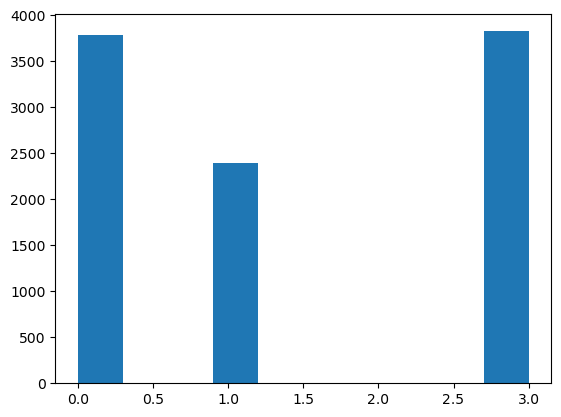

In [56]:
plt.hist(move)

In [ ]:
735

In [12]:
Sim = Simulation(gillespie_params,simulation_param,cpu_param,names,steps)

In [13]:
Res = Sim.Parallel_Run()

-15.0 is over.
-13.947 is over.
-12.894 is over.
-11.842 is over.
-10.789 is over.
-9.736 is over.
-8.684 is over.
-7.631 is over.
-6.578 is over.
-5.526 is over.
-4.473 is over.
-3.421 is over.
-2.368 is over.
-1.315 is over.
-0.263 is over.
0.789 is over.
1.842 is over.
2.894 is over.
3.947 is over.
5.0 is over.


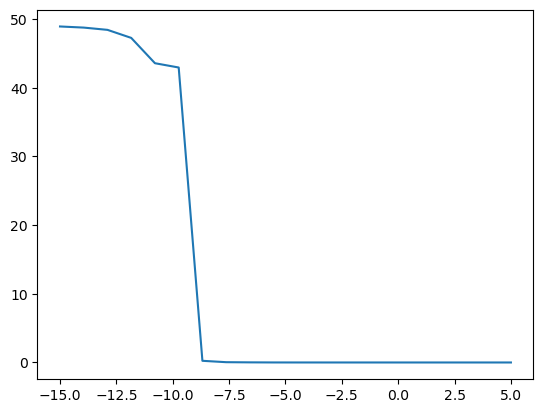

In [14]:
plt.plot(np.asarray(Res)[:,0],np.asarray(Res)[:,1])

In [76]:
Linker_E_transition = dict()
for Nlinkers in [5,10,20,30,40,50,100,1000]:
    gillespie_params.update({'Nlinker':Nlinkers-1})
    Sim = Simulation(gillespie_params,simulation_param,cpu_param,names,steps)
    Res = Sim.Parallel_Run()
    Linker_E_transition.update({Nlinkers-1:Res})

-9.473 is over.
-10.0 is over.
-8.947 is over.
-8.421 is over.
-7.894 is over.
-7.368 is over.
-6.315 is over.
-5.789 is over.
-5.263 is over.
-6.842 is over.
-4.736 is over.
-4.21 is over.
-3.684 is over.
-3.157 is over.
-2.631 is over.
-1.578 is over.
-2.105 is over.
-0.526 is over.
-1.052 is over.
0.0 is over.
-10.0 is over.
-9.473 is over.
-8.947 is over.
-8.421 is over.
-7.894 is over.
-6.315 is over.
-6.842 is over.
-7.368 is over.
-5.789 is over.
-5.263 is over.
-4.736 is over.
-4.21 is over.
-3.684 is over.
-3.157 is over.
-2.631 is over.
-1.578 is over.
-1.052 is over.
-2.105 is over.
-0.526 is over.
0.0 is over.
-10.0 is over.
-9.473 is over.
-8.947 is over.
-8.421 is over.
-7.894 is over.
-7.368 is over.
-6.842 is over.
-6.315 is over.
-5.789 is over.
-5.263 is over.
-3.684 is over.
-4.736 is over.
-4.21 is over.
-3.157 is over.
-2.631 is over.
-2.105 is over.
-1.578 is over.
-1.052 is over.
-0.526 is over.
0.0 is over.
-9.473 is over.
-8.947 is over.-10.0 is over.

-8.421 i

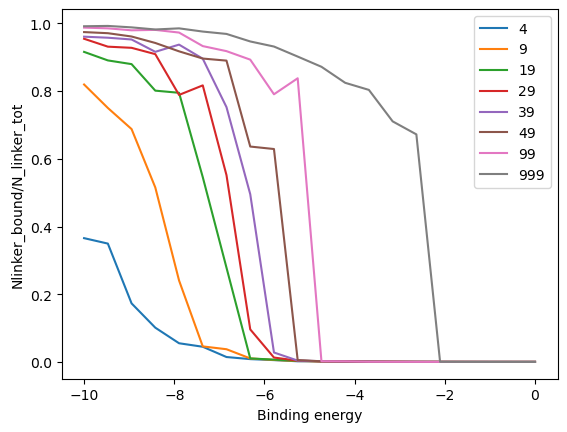

In [77]:
for key,value in Linker_E_transition.items():
    plt.plot(np.asarray(value)[:,0],np.asarray(value)[:,1]/key,label=key)
plt.xlabel('Binding energy')
plt.ylabel('Nlinker_bound/N_linker_tot')
plt.legend()
plt.savefig('N_linker_E_transition.svg',transparent=True,bbox_inches='tight')


In [83]:
Ell_E_transition = dict()
gillespie_params.update({'Nlinker':Nlinker})
gillespie_params.update({'BindingEnergy':np.linspace(-15,-5,Npoints)})
names = [str(truncate(e,3)) for e in np.linspace(-15,-5,Npoints)]
for L in [1000,2000,3000,4000,5000,10**4]:
    gillespie_params.update({'ell_tot':L})
    Sim = Simulation(gillespie_params,simulation_param,cpu_param,names,steps)
    Res = Sim.Parallel_Run()
    Ell_E_transition.update({L:Res})

-13.421 is over.
-12.368 is over.
-15.0 is over.
-13.947 is over.
-10.263 is over.
-14.473 is over.
-12.894 is over.
-10.789 is over.
-11.842 is over.
-11.315 is over.
-9.736 is over.
-9.21 is over.
-8.684 is over.
-8.157 is over.
-7.631 is over.
-7.105 is over.
-6.578 is over.
-6.052 is over.
-5.526 is over.
-5.0 is over.
-15.0 is over.
-14.473 is over.
-13.421 is over.
-12.894 is over.
-13.947 is over.
-12.368 is over.
-11.842 is over.
-10.789 is over.
-10.263 is over.
-9.736 is over.
-11.315 is over.
-9.21 is over.
-8.684 is over.
-8.157 is over.
-7.631 is over.
-7.105 is over.
-6.578 is over.
-6.052 is over.
-5.0 is over.
-5.526 is over.
-15.0 is over.
-12.894 is over.
-13.421 is over.
-12.368 is over.
-11.315 is over.
-11.842 is over.
-13.947 is over.
-10.789 is over.
-9.736 is over.
-14.473 is over.
-10.263 is over.
-9.21 is over.
-8.684 is over.
-7.631 is over.
-8.157 is over.
-7.105 is over.
-5.526 is over.
-6.578 is over.
-6.052 is over.
-5.0 is over.
-12.894 is over.
-10.789 

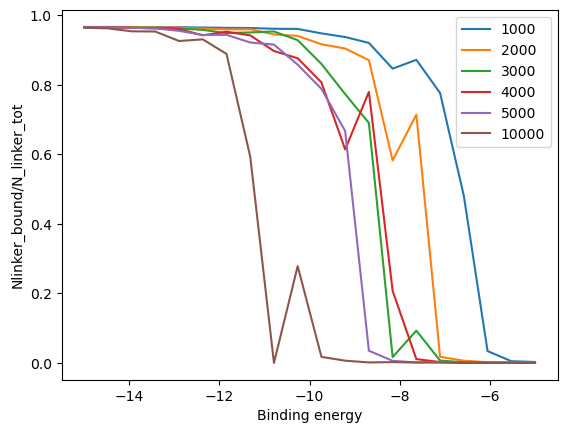

In [86]:
for key,value in Ell_E_transition.items():
    plt.plot(np.asarray(value)[:,0],np.asarray(value)[:,1]/Nlinker,label=key)
plt.xlabel('Binding energy')
plt.ylabel('Nlinker_bound/N_linker_tot')
plt.legend()
plt.savefig('Ell_E_transition.svg',transparent=True,bbox_inches='tight')


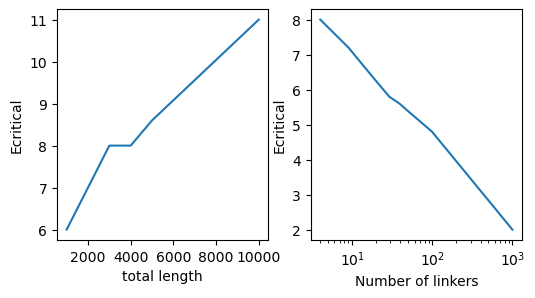

In [93]:
Ec_L = np.array([[1000,-6],[2000,-7],[3000,-8],[4000,-8],[5000,-8.6],[10**4,-11]])
Ec_N = np.array([[4,-8],[9,-7.2],[19,-6.3],[29,-5.8],[39,-5.6],[49,-5.4],[99,-4.8],[999,-2]])
fig,ax = plt.subplots(ncols=2,figsize=(6,3))
ax[0].plot(Ec_L[:,0],-Ec_L[:,1])
ax[1].plot(Ec_N[:,0],-Ec_N[:,1])
ax[0].set_xlabel('total length')
ax[0].set_ylabel('Ecritical')
ax[1].set_xlabel('Number of linkers')
ax[1].set_ylabel('Ecritical')
ax[1].set_xscale('log')
fig.savefig('transition_N_Ell.svg',transparent=True,bbox_inches='tight')

In [100]:
Ec = lambda L,N : 3/2*np.log(L/N* np.pi/3)

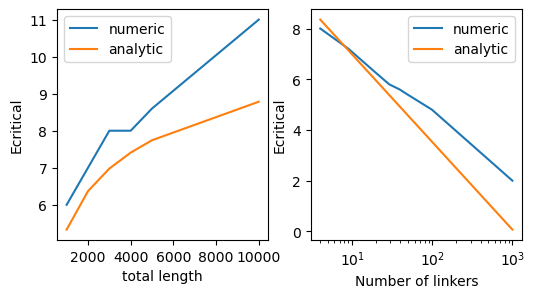

In [102]:
Ec_L = np.array([[1000,-6],[2000,-7],[3000,-8],[4000,-8],[5000,-8.6],[10**4,-11]])
Ec_N = np.array([[4,-8],[9,-7.2],[19,-6.3],[29,-5.8],[39,-5.6],[49,-5.4],[99,-4.8],[999,-2]])
fig,ax = plt.subplots(ncols=2,figsize=(6,3))
ax[0].plot(Ec_L[:,0],-Ec_L[:,1],label='numeric')
ax[0].plot(Ec_L[:,0],Ec(Ec_L[:,0],30),label='analytic')
ax[1].plot(Ec_N[:,0],-Ec_N[:,1],label='numeric')
ax[1].plot(Ec_N[:,0],Ec(1000,Ec_N[:,0]),label='analytic')
ax[0].set_xlabel('total length')
ax[0].set_ylabel('Ecritical')
ax[1].set_xlabel('Number of linkers')
ax[1].set_ylabel('Ecritical')
ax[1].set_xscale('log')
ax[0].legend()
ax[1].legend()
plt.savefig('comparison_analytic_numeric.svg',bbox_inches='tight',transparent=True)